# Data Visualization Notebook

### Import Required Libraries and Packages

In [1]:
# -----------------------------
# 📦 Imports
# -----------------------------
import numpy as np
import matplotlib.pyplot as plt
import random

### Visualize Patches from Dataset

In [2]:
# -----------------------------
# 🔍 Triplet Patch Visualization Function
# -----------------------------
def visualize_triplet_patches(npz_file, num_samples=5):
    """
    Display N triplets (anchor, positive, negative) from a triplet .npz dataset.

    Args:
        npz_file (str): Path to .npz file with 'triplets'.
        num_samples (int): Number of triplets to display.
    """
    data = np.load(npz_file)
    triplets = data['triplets']  # shape: (N, 40, 40, 3)

    # Randomly sample triplet indices
    indices = np.random.choice(triplets.shape[0], num_samples, replace=False)

    # Create a grid: 3 rows (anchor, positive, negative), num_samples columns
    fig, axes = plt.subplots(3, num_samples, figsize=(num_samples * 2, 6))
    fig.suptitle("Triplet Patches (Anchor - Positive - Negative)", fontsize=16)

    for col, idx in enumerate(indices):
        triplet = triplets[idx]
        anchor = triplet[:, :, 0]
        positive = triplet[:, :, 1]
        negative = triplet[:, :, 2]

        titles = ["Anchor", "Positive", "Negative"]
        images = [anchor, positive, negative]

        for row in range(3):
            ax = axes[row, col]
            ax.imshow(images[row], cmap='gray')
            ax.set_title(titles[row], fontsize=9)
            ax.axis('off')

    plt.tight_layout()
    plt.subplots_adjust(top=0.88)  # Room for suptitle
    plt.show()

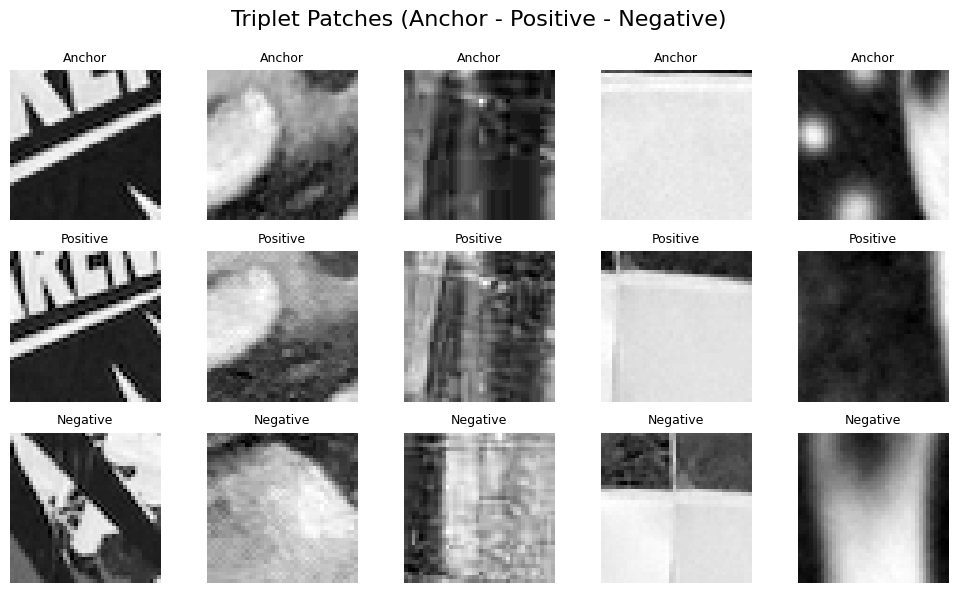

In [3]:
# -----------------------------
# ▶️ Call the function
# -----------------------------
# Example: change path if needed
visualize_triplet_patches("../data/dataset/train_dataset.npz", num_samples=5)